<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2025/blob/main/CD_P1_2025_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->




# **P1 - Solução**

In [49]:
#@markdown Nome completo e RA (*\<nome\>, \<RA\>*)
Aluno = 'Daniel Henrique, 1115665' #@param {type:"string"}






In [50]:
path = 'https://github.com/Rogerio-mack/work/raw/main/data/'

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Case**: Airbnb

Neste case, analise dados sobre imóveis alugados pela plataforma Airbnb em NYC no ano de 2019.


In [52]:
df = pd.read_csv(path + 'AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0
1,25235,Large 2 Bedroom Great for Groups!,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,Entire home/apt,125,90,162,2019-06-28,1.46,2,137
2,76761,Eveland the Place to Stay & Enjoy a 5-⭐️ 2bdrm,118971,Evelyn,Brooklyn,South Slope,40.66552,-73.99019,Entire home/apt,169,2,398,2019-06-28,3.97,3,182
3,135465,Garden apartment close to Manhattan,663879,Christopher,Brooklyn,Fort Greene,40.68626,-73.97598,Entire home/apt,170,3,86,2019-06-20,0.91,2,286
4,169002,Modern Space in Charming Pre-war,805344,Alec,Manhattan,Harlem,40.82411,-73.94934,Private room,65,2,41,2019-06-16,0.43,2,59


# Q1. Proprietários com mais imóveis na plataforma

Obtenha os 3 proprietários ("hosts") com mais imóveis sendo anunciados na plataforma, e a respectiva quantidade de imóveis anunciados.


In [53]:
df.groupby(['host_id','host_name']).id.count().sort_values(ascending=False).head()

,,id
host_id,host_name,
219517861,Sonder (NYC),7
30283594,Kara,4
120762452,Stanley,4
19303369,Hiroki,4
1513294,Urszula,2


Cuidado, a solução abaixo é incorreta:

In [54]:
df.groupby(['host_name']).id.count().sort_values(ascending=False).head()

,id
host_name,
Sonder (NYC),7
Mark,7
David,6
Andrew,6
Michael,5


# Q2A. Locatários profissionais $\times$ anunciantes com um único imóvel

Considere o preço médio dos imóveis. Qual a diferença do preço médio dos imóveis dos anunciantes com mais de um imóvel e dos anunciantes com um único imóvel anunciado na plataforma?

In [55]:
contagem_por_host = df.groupby('host_id').id.count()
imoveis_filtrados= contagem_por_host[ contagem_por_host > 1 ].index

preco_mais_de_um_imovel = df[ df.host_id.isin( imoveis_filtrados ) ].price.mean()
preco_mais_um_imovel = df[ ~df.host_id.isin( imoveis_filtrados ) ].price.mean()

print( f'Diferença de preços: USD {preco_mais_de_um_imovel - preco_mais_um_imovel:.2f}')

Diferença de preços: USD 67.81


# Q2B. Preço nos bairros com mais imóveis

 Qual o preço médio dos imóveis, considerando somente os preços dos imóveis cujos bairros (`neighbourhood`) tenham mais de 20 imóveis sendo anunciados?  


In [56]:
# contagem_por_bairro = df['neighbourhood'].value_counts()
# or
contagem_por_bairro = df.groupby(['neighbourhood']).id.count()

bairros_filtrados = contagem_por_bairro[contagem_por_bairro > 20].index
df_filtrado = df[df['neighbourhood'].isin(bairros_filtrados)]
preco_medio = df_filtrado['price'].mean()

print(f'O preço médio dos imóveis em bairros com mais de 20 anúncios é: USD {preco_medio:.2f}')

O preço médio dos imóveis em bairros com mais de 20 anúncios é: USD 151.42


# Q3A.  Manhattan *outliers*

Qual o percentual de imóveis de Manhattan com preços estatisticamente discrepantes (*outliers*) com relação aos preços de todos os imóveis?



In [57]:
q1, q3 = df.price.quantile([0.25,0.75])
iqr = q3 - q1

selection = (df.neighbourhood_group == 'Manhattan') & ((df.price >= q3 + 1.5 * iqr) | (df.price <= q1 - 1.5 * iqr))
perc_Manhattan = df[ selection ].id.count() / len(df[ (df.neighbourhood_group == 'Manhattan') ]) * 100

print( f'Percentuais de outliers de preços, Manhattan: {perc_Manhattan:.2f} %')


Percentuais de outliers de preços, Manhattan: 10.05 %


# Q3B.  Brooklyn *outliers*

Qual o percentual de imóveis de Manhattan com preços estatisticamente discrepantes (*outliers*) com relação aos preços de todos os imóveis?



In [58]:
q1, q3 = df.price.quantile([0.25,0.75])
iqr = q3 - q1

selection = (df.neighbourhood_group == 'Brooklyn') & ((df.price >= q3 + 1.5 * iqr) | (df.price <= q1 - 1.5 * iqr))
perc_Brooklyn  = df[ selection ].id.count() / len(df[ (df.neighbourhood_group == 'Brooklyn') ]) * 100

print( f'Percentuais de outliers de preços, Brooklyn: {perc_Brooklyn:.2f} %')


Percentuais de outliers de preços, Brooklyn: 3.94 %


# Q4A. Preços $\times$ Descrições

Considere as descrições dos anúncios em `df.name`. Crie uma coluna `df['word']` que contém 'beautiful','sunny','spacious' ou 'heart' de acordo com a presença dessa palavra no anúncio. Caso não tenha nenhuma das palavras, assinale 'others'. Ao final, verifique a quantidade e o preço médio dos imóveis para cada grupo dessas palavras nos anúncios.

Atenção, considere a ordem 'beautiful','sunny','spacious' ou 'heart' (isto é, se o texto contém duas ou mais palavras, por exemplo 'beautiful' e 'sunny', considere 'beautiful'). Considere também quaisquer combinações de maiúsculas/minúsculas nas palavras.

In [59]:
df['word'] = 'others'
df.loc[ df.name.isnull(), 'name' ] = ' '

for word in ['beautiful','sunny','spacious','heart'][::-1]:
  df.loc[ df.name.str.lower().str.contains(word)  , 'word' ] = word

df.groupby('word')[['word','price']].agg({'word':['count'],'price':['mean']}).sort_values(by=('price','mean'),ascending=False)

,word,price
,count,mean
word,,
heart,36,166.388889
others,624,157.886218
beautiful,41,137.926829
sunny,43,137.674419
spacious,60,128.516667


# Q4B. Scores

Nesta tarefa você deve atribuir a cada imóvel um valor de *score* (`df['score']`) baseado nas seguintes regras:

1. Imóveis com `availability_365` > 90 recebem +10 pontos enquanto imóveis com `availability_365` < 5 recebem -5 pontos;
2. Imóveis com o número de reviews >= 10 recebem +5 pontos para cada 10 reviews (por ex. se número de reviews = 20, são atribuídos +10 pontos). Se número de reviews = 0 o imóvel recebe -5 pontos;
3. Imóveis com preço abaixo da média de seu `neighbourhood`	recebem +5 pontos.

Implemente empregando `apply()` ou um laço de programa, como preferir.

In [60]:
avg_price_by_neighborhood = df.groupby('neighbourhood')['price'].mean()

df['score'] = 0

for index, row in df.iterrows():
  score = 0
  if row['availability_365'] > 90:
    score += 10
  if row['availability_365'] < 5:
    score -= 5

  if row['number_of_reviews'] >= 10:
    score += int(row['number_of_reviews'] / 10) * 5
  elif row['number_of_reviews'] == 0:
    score -= 5

  if row['price'] < avg_price_by_neighborhood[row['neighbourhood']]:
    score += 5

  df.loc[index, 'score'] = score

print(f'A soma dos valores de score é: ', df['score'].sum())


A soma dos valores de score é:  10955


In [61]:
avg_price_by_neighborhood = df.groupby('neighbourhood')['price'].mean()

def calculate_score(row):
    score = 0
    if row['availability_365'] > 90:
        score += 10
    if row['availability_365'] < 5:
        score -= 5

    if row['number_of_reviews'] >= 10:
        score += int(row['number_of_reviews'] / 10) * 5
    elif row['number_of_reviews'] == 0:
        score -= 5

    if row['price'] < avg_price_by_neighborhood[row['neighbourhood']]:
        score += 5
    return score

df['score'] = df.apply(calculate_score, axis=1)

print(f'A soma dos valores de score é: ', df['score'].sum())


A soma dos valores de score é:  10955


Não era necessário, mas aqui uma visualização da distribuição dos scores...



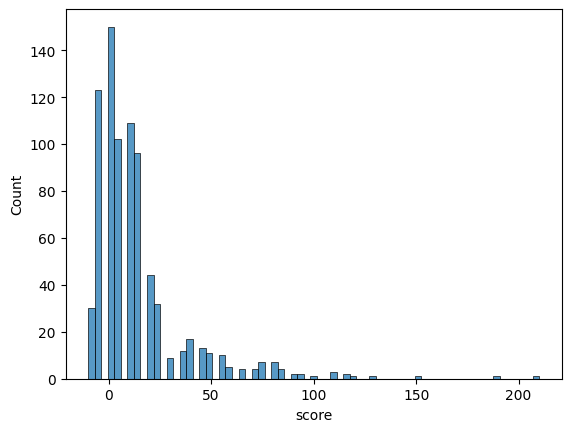

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df.score)
plt.show()

# Q5. Enriquecendo os dados

Enriqueça os dados dos imóveis com os valores dos impostos e multas municipais. Cacule a média de impostos e multas de cada grupo de vizinhaça, `neighbourhood_group`. Note que existem imóveis sem impostos e sem multas, esses são imóveis isentos, mas devem ser considerados nos cálculos de média (por exemplo, você pode considerar esses imóveis com valor 0).

In [63]:
df_taxes = pd.read_csv(path + 'AB_NYC_2019_taxes.csv')
df_taxes

,id,type,value
0,35907127,taxes,1315.0
1,804815,taxes,NaN
2,22328585,taxes,900.0
3,27876600,taxes,869.0
4,34976037,taxes,1629.0
...,...,...,...
1523,34284316,fines,NaN
1524,20325804,fines,NaN
1525,25872986,fines,NaN
1526,19365218,fines,906.0


In [64]:
df_taxes = pd.read_csv(path + 'AB_NYC_2019_taxes.csv')
df_taxes = pd.pivot_table(df_taxes, index='id', columns='type', values='value')

merged_df = pd.merge(df, df_taxes, on='id', how='outer')

df_group = merged_df.groupby('neighbourhood_group', dropna=False)[['taxes', 'fines','id']].agg({'taxes': 'sum', 'fines': 'sum', 'id': 'count'})
df_group['taxes_mean'] = df_group['taxes'] / df_group['id']
df_group['fines_mean'] = df_group['fines'] / df_group['id']
df_group.astype(int)


,taxes,fines,id,taxes_mean,fines_mean
neighbourhood_group,,,,,
Bronx,16170,2403,20,808,120
Brooklyn,263491,96543,330,798,292
Manhattan,314651,111503,368,855,302
Queens,62725,25176,79,793,318
Staten Island,6945,3488,7,992,498


Solução alternativa...

In [65]:
df_taxes = pd.read_csv(path + 'AB_NYC_2019_taxes.csv')
df_taxes = pd.pivot_table(df_taxes, index='id', columns='type', values='value')

merged_df = pd.merge(df, df_taxes, on='id', how='outer')
merged_df

merged_df.fillna(0, inplace=True)
merged_df.groupby('neighbourhood_group')[['taxes','fines']].mean().astype(int)

,taxes,fines
neighbourhood_group,,
Bronx,808,120
Brooklyn,798,292
Manhattan,855,302
Queens,793,318
Staten Island,992,498


Note, o inner join leva a valores errados.

In [66]:
df_taxes = pd.read_csv(path + 'AB_NYC_2019_taxes.csv')
df_taxes = pd.pivot_table(df_taxes, index='id', columns='type', values='value')

merged_df = pd.merge(df, df_taxes, on='id')

merged_df.groupby('neighbourhood_group',dropna=False)[['taxes','fines']].mean().astype(int)

,taxes,fines
neighbourhood_group,,
Bronx,1078,1201
Brooklyn,1126,975
Manhattan,1073,1103
Queens,980,1007
Staten Island,1389,1744


# Q6. Quebras

Construa no `Pandas` um "relatório" (`df_report`) como abaixo. Os valores são ordenados `neighbourhood_group`,`neighbourhood`. Cada "página" contém apenas 30 linhas. A cada "quebra" de `neighbourhood_group` é gerada uma linha com preço médio do `neighbourhood_group` e, então, é iniciada uma nova página.

O item `line_id` é opcional mas deve auxiliá-lo nessa tarefa.

Ao final produza a soma dos preços das páginas abaixo...

In [77]:
df = df.sort_values(['neighbourhood_group','neighbourhood']).reset_index(drop=True)

previous_neighbourhood_group = None
df_report = pd.DataFrame({'neighbourhood_group':[],'neighbourhood':[],'price':[],'page_id':[],'line_id':[]})
page_id = 1
line_id = 1
for ix, row in df.iterrows():
  if line_id > 30:
    line_id = 1
    page_id += 1

  if previous_neighbourhood_group != row.neighbourhood_group and previous_neighbourhood_group is not None:
    df_report.loc[len(df_report)] = previous_neighbourhood_group, 'MEAN', df[ df.neighbourhood_group == previous_neighbourhood_group ].price.mean(), page_id, line_id
    page_id += 1
    line_id = 1

  df_report.loc[len(df_report)] = row.neighbourhood_group, row.neighbourhood, row.price, page_id, line_id
  line_id += 1

  previous_neighbourhood_group = row.neighbourhood_group

df_report.loc[len(df_report)] = row.neighbourhood_group, 'MEAN', df[ df.neighbourhood_group == previous_neighbourhood_group ].price.mean(), page_id, line_id

df_report

,neighbourhood_group,neighbourhood,price,page_id,line_id
0,Bronx,Belmont,29.000000,1,1
1,Bronx,Claremont Village,67.000000,1,2
2,Bronx,Concourse,40.000000,1,3
3,Bronx,Edenwald,90.000000,1,4
4,Bronx,Edenwald,80.000000,1,5
...,...,...,...,...,...
804,Staten Island,South Beach,100.000000,30,4
805,Staten Island,St. George,130.000000,30,5
806,Staten Island,Todt Hill,135.000000,30,6
807,Staten Island,Tompkinsville,59.000000,30,7


Algumas checagens...

In [78]:
df_summary = df_report[ df_report.neighbourhood == 'MEAN' ].reset_index(drop=True)
page_previous = 0
df_summary['qty'] = 0

for i in range(len(df_summary)):
    df_summary.loc[i,'qty'] = (df_summary.loc[i,'page_id'] - page_previous - 1)*30 + df_summary.loc[i,'line_id'] - 1
    page_previous = df_summary.loc[i,'page_id']

df_summary

,neighbourhood_group,neighbourhood,price,page_id,line_id,qty
0,Bronx,MEAN,71.500000,1,21,20
1,Brooklyn,MEAN,128.087879,13,1,330
2,Manhattan,MEAN,196.157609,26,9,368
3,Queens,MEAN,92.227848,29,20,79
4,Staten Island,MEAN,89.428571,30,8,7


In [79]:
df.groupby(['neighbourhood_group']).price.agg(['mean','count'])

,mean,count
neighbourhood_group,,
Bronx,71.500000,20
Brooklyn,128.087879,330
Manhattan,196.157609,368
Queens,92.227848,79
Staten Island,89.428571,7


Somas...

In [80]:
sum_price_pages = df_report[ df_report.page_id.isin([1,24,25,28]) ].groupby('page_id').price.sum().astype(int).sum()

print(f'A soma dos preços das páginas 1, 24, 25 e 28 é: {sum_price_pages}')

A soma dos preços das páginas 1, 24, 25 e 28 é: 12633


In [81]:
sum_price_pages = df_report[ df_report.page_id.isin([1,24,25,26,28]) ].groupby('page_id').price.sum().astype(int).sum()

print(f'A soma dos preços das páginas 1, 24, 25, 26 e 28 é: {sum_price_pages}')

A soma dos preços das páginas 1, 24, 25, 26 e 28 é: 17838


Você pode verificar alguns checks...

In [72]:
df_report.iloc[-10::,:]

,neighbourhood_group,neighbourhood,price,page_id,line_id
799,Queens,Woodside,120.000000,29,19
800,Queens,MEAN,92.227848,29,20
801,Staten Island,Arden Heights,83.000000,30,1
802,Staten Island,Randall Manor,99.000000,30,2
803,Staten Island,South Beach,20.000000,30,3
804,Staten Island,South Beach,100.000000,30,4
805,Staten Island,St. George,130.000000,30,5
806,Staten Island,Todt Hill,135.000000,30,6
807,Staten Island,Tompkinsville,59.000000,30,7
808,Staten Island,MEAN,89.428571,30,8


In [73]:
df_report.iloc[0:32,:]

,neighbourhood_group,neighbourhood,price,page_id,line_id
0,Bronx,Belmont,29.0,1,1
1,Bronx,Claremont Village,67.0,1,2
2,Bronx,Concourse,40.0,1,3
3,Bronx,Edenwald,90.0,1,4
4,Bronx,Edenwald,80.0,1,5
5,Bronx,Fieldston,85.0,1,6
6,Bronx,Fieldston,109.0,1,7
7,Bronx,Fordham,79.0,1,8
8,Bronx,Highbridge,22.0,1,9
9,Bronx,Melrose,69.0,1,10


# Q7. Reviews $\times$ Preços (**Questão NÃO APLICADA, apenas para consulta**)

Considere todos imóveis a 60a maior quantidade de reviews ou mais. Qual a diferença do preço médio desses imóveis com relação à média geral do preço dos preços?

In [74]:
more_reviews = df.nlargest(60,'number_of_reviews').number_of_reviews.min()
price_more_reviews = df[df.number_of_reviews >= more_reviews].price.mean()
price_no_reviews = df[df.number_of_reviews == 0].price.mean()

print( f'Preço médio de imóveis com mais reviews: {price_more_reviews:.2f}')
print( f'Preço médio de imóveis com menos reviews: {price_no_reviews:.2f}')
print( f'Diferença de preços: {price_more_reviews - price_no_reviews:.2f}')


Preço médio de imóveis com mais reviews: 111.58
Preço médio de imóveis com menos reviews: 188.89
Diferença de preços: -77.31


Solução alternativa...

In [75]:
valores_unicos = df['number_of_reviews']
valores_unicos_ordenados = sorted(valores_unicos, reverse=True)
more_reviews = valores_unicos_ordenados[min(59, len(valores_unicos_ordenados) - 1)]

price_more_reviews = df[df.number_of_reviews >= more_reviews].price.mean()
price_no_reviews = df[df.number_of_reviews == 0].price.mean()

print( f'Preço médio de imóveis com mais reviews: {price_more_reviews:.2f}')
print( f'Preço médio de imóveis com menos reviews: {price_no_reviews:.2f}')
print( f'Diferença de preços: {price_more_reviews - price_no_reviews:.2f}')

Preço médio de imóveis com mais reviews: 111.58
Preço médio de imóveis com menos reviews: 188.89
Diferença de preços: -77.31


Cuidado, o `nlargest`, mas limita a quantidade como explicamos em sala...

In [76]:
price_more_reviews = df.nlargest(60,'number_of_reviews').price.mean()
price_no_reviews = df[df.number_of_reviews == 0].price.mean()

print( f'Preço médio de imóveis com mais reviews: {price_more_reviews:.2f}')
print( f'Preço médio de imóveis com menos reviews: {price_no_reviews:.2f}')
print( f'Diferença de preços: {price_more_reviews - price_no_reviews:.2f}')

Preço médio de imóveis com mais reviews: 111.13
Preço médio de imóveis com menos reviews: 188.89
Diferença de preços: -77.76
